In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/FullyMelted1.csv')
df = df.drop(['pred', 'Unnamed: 0.1'], axis = 1)

In [ ]:
"""

As of 12/5/23 at 10:30am, this notebook has been run using the final version of FullyMelted.csv

Values should be usable for the presentation and report

"""

'\n\nAs of 12/5/23 at 10:30am, this notebook has been run using the final version of FullyMelted.csv\n\nValues should be usable for the presentation and report\n\n'

# ML vs Baseline

In [ ]:
df[(df['Year']==1904) & (df['Country']=='USA')]
# df = df.drop([3188])

,Unnamed: 0,Country,Year,MedalsWon,GDP,Children,Emissions,Gini,Internet_Users,Life_Expectancy,Population,MedalsWon_Total
3188,3188,USA,1904,233,5.6175,3.77,10.975,51.2,0.0,50.175,81500000.0,2698


In [ ]:
df['MedalsWonYearSum'] = df.groupby('Year')['MedalsWon'].transform('sum')/124
df[df['Year']==1980]

,Unnamed: 0,Country,Year,MedalsWon,GDP,Children,Emissions,Gini,Internet_Users,Life_Expectancy,Population,MedalsWon_Total,MedalsWonYearSum
18,18,AFG,1980,0,3.432500,7.4500,0.15300,32.900,0.0,44.200,11700000.0,2,5.669355
45,45,ALG,1980,0,5.120000,6.7000,2.54000,42.400,0.0,59.550,19075000.0,15,5.669355
72,72,ARG,1980,0,-0.002500,3.2950,3.77750,40.800,0.0,70.300,28250000.0,70,5.669355
99,99,ARM,1980,0,0.704000,2.3900,5.52750,41.500,0.0,70.425,3152500.0,11,5.669355
126,126,AUS,1980,9,2.390500,1.9125,15.12500,31.150,0.0,74.600,14825000.0,482,5.669355
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3231,3231,UZB,1980,0,0.688425,5.0525,6.51000,51.200,0.0,67.425,16125000.0,21,5.669355
3258,3258,VEN,1980,1,-0.824250,4.1525,5.71500,35.000,0.0,69.850,15425000.0,12,5.669355
3285,3285,VIE,1980,0,2.140750,4.9600,0.31425,35.000,0.0,66.425,53675000.0,2,5.669355
3312,3312,ZAM,1980,0,0.406750,7.0550,0.58875,66.175,0.0,55.625,5815000.0,2,5.669355


In [ ]:
from sklearn.model_selection import train_test_split

# Original data split into 85% training and 15% test
X_train_large, X_test, y_train_large, y_test = train_test_split(
    df.drop(['Unnamed: 0', 'Country','MedalsWon', 'MedalsWon_Total'], axis=1),
    df['MedalsWon'], test_size=0.15, random_state=42
)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Extract features and target variable

X_baseline = merged_df = pd.concat([y_train_large, X_train_large['Year']], axis=1)
y_baseline = X_train_large['MedalsWonYearSum']

# Split the data into training and testing sets
X_train_baseline, X_test_baseline, y_train_baseline, y_test_baseline = train_test_split(X_baseline, y_baseline, test_size=0.15 / 0.85, random_state=42)

# Train baseline model
model_baseline = LinearRegression()
model_baseline.fit(X_train_baseline, y_train_baseline)

# Predictions on the test set
y_pred_baseline = model_baseline.predict(X_test_baseline)

# Evaluate the baseline model
r2_baseline = r2_score(X_test_baseline['MedalsWon'], y_pred_baseline)
mse_baseline = mean_squared_error(X_test_baseline['MedalsWon'], y_pred_baseline)

print("Baseline Model Scores:")
print("R^2 Score:", r2_baseline)
print("Root Mean Squared Error:", mse_baseline**.5)

Baseline Model Scores:
R^2 Score: 0.033553927802364436
Root Mean Squared Error: 18.728494438096313


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import RFE
# Split the data into training and testing sets
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_train_large, y_train_large, test_size=0.15 / 0.85, random_state=42)

# Feature polynomial expansion
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly_expanded = pd.DataFrame(poly.fit_transform(X_train_poly), columns=poly.get_feature_names_out(X_train_poly.columns))
X_test_poly_expanded = pd.DataFrame(poly.transform(X_test_poly), columns=poly.get_feature_names_out(X_test_poly.columns))

# Feature selection using Recursive Feature Elimination (RFE)
# Adjust the n_features_to_select parameter based on your preference
lr_poly = LinearRegression()
rfe_poly = RFE(lr_poly, n_features_to_select=5)
X_train_poly_selected = rfe_poly.fit_transform(X_train_poly_expanded, y_train_poly)
X_test_poly_selected = rfe_poly.transform(X_test_poly_expanded)

# Get the selected feature names
selected_feature_names_poly = X_train_poly_expanded.columns[rfe_poly.support_]

print("Selected Features (Polynomial + Recursive):", selected_feature_names_poly)

# Train linear regression model using selected features
model_poly = LinearRegression()
model_poly.fit(X_train_poly_selected, y_train_poly)

# Predictions on the test set
y_pred_poly = model_poly.predict(X_test_poly_selected)

# Evaluate the model
r2_poly = r2_score(y_test_poly, y_pred_poly)
mse_poly = mean_squared_error(y_test_poly, y_pred_poly)

print("Polynomial + Recursive Model Scores:")
print("R^2 Score:", r2_poly)
print("Root Mean Squared Error:", mse_poly**.5)


Selected Features (Polynomial + Recursive): Index(['Children', 'Emissions', 'MedalsWonYearSum', 'Children^2',
       'Children Emissions'],
      dtype='object')
Polynomial + Recursive Model Scores:
R^2 Score: 0.21870270307215156
Root Mean Squared Error: 16.839229446728364


In [ ]:
# Split the data into training and testing sets
X_train_recursive, X_test_recursive, y_train_recursive, y_test_recursive = train_test_split(X_train_large, y_train_large, test_size=0.15 / 0.85, random_state=42)

# Feature selection using Recursive Feature Elimination (RFE)
# Adjust the n_features_to_select parameter based on your preference
lr_recursive = LinearRegression()
rfe_recursive = RFE(lr_recursive, n_features_to_select=5)
X_train_recursive_selected = rfe_recursive.fit_transform(X_train_recursive, y_train_recursive)
X_test_recursive_selected = rfe_recursive.transform(X_test_recursive)

# Get the selected feature names
selected_feature_names_recursive = X_train_recursive.columns[rfe_recursive.support_]

print("Selected Features (Recursive):", selected_feature_names_recursive)

# Train linear regression model using selected features
model_recursive = LinearRegression()
model_recursive.fit(X_train_recursive_selected, y_train_recursive)

# Predictions on the test set
y_pred_recursive = model_recursive.predict(X_test_recursive_selected)

# Evaluate the model
r2_recursive = r2_score(y_test_recursive, y_pred_recursive)
mse_recursive = mean_squared_error(y_test_recursive, y_pred_recursive)

print("Recursive Model Scores:")
print("R^2 Score:", r2_recursive)
print("Root Mean Squared Error:", mse_recursive**.5)


Selected Features (Recursive): Index(['GDP', 'Children', 'Emissions', 'Internet_Users', 'MedalsWonYearSum'], dtype='object')
Recursive Model Scores:
R^2 Score: 0.14755261163348088
Root Mean Squared Error: 17.58927123357575


In [ ]:
# Split the data into training and testing sets
X_train_custom, X_test_custom, y_train_custom, y_test_custom = train_test_split(X_train_large, y_train_large, test_size=0.15 / 0.85, random_state=42)
# Train linear regression model using selected features
model_custom = LinearRegression()
model_custom.fit(X_train_custom, y_train_custom )

# Predictions on the test set
y_pred_custom = model_custom.predict(X_test_custom)

# Evaluate the model
r2_custom  = r2_score(y_test_custom , y_pred_custom )
mse_custom  = mean_squared_error(y_test_custom , y_pred_custom )

print("Custom Model Scores:")
print("R^2 Score:", r2_custom )
print("Root Mean Squared Error:", mse_custom**.5 )

Custom Model Scores:
R^2 Score: 0.22856451837858616
Root Mean Squared Error: 16.732616548438074


In [ ]:
# Add 1 to the MedalsWon column
y_train_large += 1

# Split the data into training and testing sets
X_train_poly_plus_one, X_test_poly_plus_one, y_train_poly_plus_one, y_test_poly_plus_one = train_test_split(X_train_large, y_train_large, test_size=0.15 / 0.85, random_state=42)

# Feature polynomial expansion
poly_plus_one = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly_plus_one_expanded = poly_plus_one.fit_transform(X_train_poly_plus_one)
X_test_poly_plus_one_expanded = poly_plus_one.transform(X_test_poly_plus_one)

# Feature selection using Recursive Feature Elimination (RFE)
# Adjust the n_features_to_select parameter based on your preference
lr_poly_plus_one = LinearRegression()
rfe_poly_plus_one = RFE(lr_poly_plus_one, n_features_to_select=5)
X_train_poly_plus_one_selected = rfe_poly_plus_one.fit_transform(X_train_poly_plus_one_expanded, y_train_poly_plus_one)
X_test_poly_plus_one_selected = rfe_poly_plus_one.transform(X_test_poly_plus_one_expanded)

# Get the selected feature names
selected_feature_names_poly_plus_one = poly_plus_one.get_feature_names_out(X_train_poly_plus_one.columns)[
    rfe_poly_plus_one.support_
]

print("Selected Features (Polynomial + Recursive) after adding 1 to MedalsWon:")
print(selected_feature_names_poly_plus_one)

# Train linear regression model using selected features
model_poly_plus_one = LinearRegression()
model_poly_plus_one.fit(X_train_poly_plus_one_selected, y_train_poly_plus_one)

# Predictions on the test set
y_pred_poly_plus_one = model_poly_plus_one.predict(X_test_poly_plus_one_selected)

# Evaluate the model
r2_poly_plus_one = r2_score(y_test_poly_plus_one, y_pred_poly_plus_one)
mse_poly_plus_one = mean_squared_error(y_test_poly_plus_one, y_pred_poly_plus_one)

print("\nPolynomial + Recursive Model Scores after adding 1 to MedalsWon:")
print("R^2 Score:", r2_poly_plus_one)
print("Root Mean Squared Error:", mse_poly_plus_one**.5)
y_train_large-= 1

Selected Features (Polynomial + Recursive) after adding 1 to MedalsWon:
['Children' 'Emissions' 'MedalsWonYearSum' 'Children^2'
 'Children Emissions']

Polynomial + Recursive Model Scores after adding 1 to MedalsWon:
R^2 Score: 0.21870270307215156
Root Mean Squared Error: 16.839229446728364


In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X_train_large, y_train_large, test_size=0.15 / 0.85, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_nn_scaled = scaler.fit_transform(X_train_nn)
X_test_nn_scaled = scaler.transform(X_test_nn)

# Create and train the neural network model
model_nn = MLPRegressor(hidden_layer_sizes=(3, 32), max_iter=500, random_state=42)
model_nn.fit(X_train_nn_scaled, y_train_nn)

# Predictions on the test set
y_pred_nn = model_nn.predict(X_test_nn_scaled)

# Evaluate the model
r2_nn = r2_score(y_test_nn, y_pred_nn)
mse_nn = mean_squared_error(y_test_nn, y_pred_nn)

print("\nNeural Network Model Scores:")
print("R^2 Score:", r2_nn)
print("Root Mean Squared Error:", mse_nn**.5)



Neural Network Model Scores:
R^2 Score: 0.6960115247667551
Root Mean Squared Error: 10.503707351492563


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
from sklearn.ensemble import RandomForestRegressor
# Split the data into training and testing sets
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_train_large, y_train_large, test_size=0.15 / 0.85, random_state=42)

# Create and train the random forest model
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train_rf, y_train_rf)

# Predictions on the test set
y_pred_rf = model_rf.predict(X_test_rf)

# Evaluate the model
r2_rf = r2_score(y_test_rf, y_pred_rf)
mse_rf = mean_squared_error(y_test_rf, y_pred_rf)

print("Random Forest Model Scores:")
print("R^2 Score:", r2_rf)
print("Root Mean Squared Error:", mse_rf**.5)


Random Forest Model Scores:
R^2 Score: 0.753533123206166
Root Mean Squared Error: 9.457869875637591


In [ ]:
# Add 1 to the MedalsWon column
y_train_large += 1

# Split the data into training and testing sets
X_train_rf_medals_plus_one, X_test_rf_medals_plus_one, y_train_rf_medals_plus_one, y_test_rf_medals_plus_one = train_test_split(X_train_large, y_train_large, test_size=0.15 / 0.85, random_state=42)

# Create and train the random forest model with medals + 1
model_rf_medals_plus_one = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf_medals_plus_one.fit(X_train_rf_medals_plus_one, y_train_rf_medals_plus_one)

# Predictions on the test set
y_pred_rf_medals_plus_one = model_rf_medals_plus_one.predict(X_test_rf_medals_plus_one)

# Evaluate the model
r2_rf_medals_plus_one = r2_score(y_test_rf_medals_plus_one, y_pred_rf_medals_plus_one)
mse_rf_medals_plus_one = mean_squared_error(y_test_rf_medals_plus_one, y_pred_rf_medals_plus_one)

print("Random Forest Model with MedalsWon + 1 Scores:")
print("R^2 Score:", r2_rf_medals_plus_one)
print("Root Mean Squared Error:", mse_rf_medals_plus_one**.5)
y_train_large -= 1


Random Forest Model with MedalsWon + 1 Scores:
R^2 Score: 0.7495511323010962
Root Mean Squared Error: 9.533965805274484


In [ ]:
# Store scores in a dictionary for easy comparison
models_scores = {
    'Baseline Model': {'R^2': r2_baseline, 'MSE': mse_baseline},
    'Polynomial + Recursive (Original)': {'R^2': r2_poly, 'MSE': mse_poly},
    'Polynomial + Recursive (MedalsWon + 1)': {'R^2': r2_poly_plus_one, 'MSE': mse_poly_plus_one},
    'Recursive Selection': {'R^2': r2_recursive, 'MSE': mse_recursive},
    'Custom Model': {'R^2': r2_custom, 'MSE': mse_custom},  # Replace with actual variable names for the custom model
    'Neural Network': {'R^2': r2_nn, 'MSE': mse_nn},
    'Random Forest': {'R^2': r2_rf, 'MSE': mse_rf},
    'Random Forest (MedalsWon + 1)': {'R^2': r2_rf_medals_plus_one, 'MSE': mse_rf_medals_plus_one}
}

# Print scores
print("Model Scores:")
for model, scores in models_scores.items():
    print(f"{model} - R^2: {scores['R^2']}, MSE: {scores['MSE']}")

# Identify best and worst models
best_model = max(models_scores, key=lambda x: models_scores[x]['R^2'])
worst_model = min(models_scores, key=lambda x: models_scores[x]['R^2'])

print(f"\nBest Model: {best_model} - R^2: {models_scores[best_model]['R^2']}, MSE: {models_scores[best_model]['MSE']}")
print(f"Worst Model: {worst_model} - R^2: {models_scores[worst_model]['R^2']}, MSE: {models_scores[worst_model]['MSE']}")

# Print additional requested information
sorted_models = sorted(models_scores.items(), key=lambda x: x[1]['R^2'], reverse=True)
print("\nTop Models (Based on R^2):")
for i, (model, scores) in enumerate(sorted_models[:2]):
    print(f"{i + 1}. {model} - R^2: {scores['R^2']}, MSE: {scores['MSE']}")

print("\nBottom Models (Based on R^2):")
for i, (model, scores) in enumerate(sorted_models[-2:][::-1]):
    print(f"{len(models_scores) - i}. {model} - R^2: {scores['R^2']}, MSE: {scores['MSE']}")


Model Scores:
Baseline Model - R^2: 0.033553927802364436, MSE: 350.75650391780454
Polynomial + Recursive (Original) - R^2: 0.21870270307215156, MSE: 283.5596483595636
Polynomial + Recursive (MedalsWon + 1) - R^2: 0.21870270307215156, MSE: 283.5596483595636
Recursive Selection - R^2: 0.14755261163348088, MSE: 309.3824625282954
Custom Model - R^2: 0.22856451837858616, MSE: 279.98045655706363
Neural Network - R^2: 0.6960115247667551, MSE: 110.32786812579893
Random Forest - R^2: 0.753533123206166, MSE: 89.45130258449304
Random Forest (MedalsWon + 1) - R^2: 0.7495511323010962, MSE: 90.89650397614314

Best Model: Random Forest - R^2: 0.753533123206166, MSE: 89.45130258449304
Worst Model: Baseline Model - R^2: 0.033553927802364436, MSE: 350.75650391780454

Top Models (Based on R^2):
1. Random Forest - R^2: 0.753533123206166, MSE: 89.45130258449304
2. Random Forest (MedalsWon + 1) - R^2: 0.7495511323010962, MSE: 90.89650397614314

Bottom Models (Based on R^2):
8. Baseline Model - R^2: 0.033553

In [ ]:
# Predictions on the test set
y_pred_best = model_nn.predict(X_test)

# Evaluate the model
r2_nn = r2_score(y_test, y_pred_best)
mse_nn = mean_squared_error(y_test, y_pred_best)

print("\nNeural Network Model Scores:")
print("R^2 Score:", r2_nn)
print("Root Mean Squared Error:", mse_nn**.5)



Neural Network Model Scores:
R^2 Score: -573223199042301.4
Root Mean Squared Error: 460178201.979555


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(


In [ ]:
# Predictions on the test set
y_pred_2nd = model_rf.predict(X_test)

# Evaluate the model
r2_2nd = r2_score(y_test, y_pred_2nd)
mse_2nd = mean_squared_error(y_test, y_pred_2nd)

print("Random Forest Model Scores:")
print("R^2 Score:", r2_2nd)
print("Root Mean Squared Error:", mse_2nd**.5)


Random Forest Model Scores:
R^2 Score: 0.7330205071720044
Root Mean Squared Error: 9.931231727146955


In [ ]:
print('Feature Weights:')
features = model_rf.feature_importances_
for x in range(len(features)):
  print(X_train_rf.columns[x], ": ", features[x])

Feature Weights:
Year :  0.024675115117111276
GDP :  0.043046942928985095
Children :  0.09563697262832357
Emissions :  0.3687300715881874
Gini :  0.05879464800496549
Internet_Users :  0.007515296435839044
Life_Expectancy :  0.05499692126116149
Population :  0.3294241405048744
MedalsWonYearSum :  0.01717989153055229


In [ ]:
"""


Below is some exploration of our models with visualizations


"""

'\n\n\nBelow is some exploration of our models with visualizations\n\n\n'

In [ ]:
"""
This function will return a valid series of features to give a trained model
"""
def predict(year=1896, country='AFG'):
  d = df[(df['Year']==year)&(df['Country']==country)].drop(['Unnamed: 0', 'Country','MedalsWon', 'MedalsWon_Total'], axis=1)
  return d

In [ ]:
print('USA, 2008 with RF: ', model_rf.predict(predict(2008, 'USA')))
print('USA, 2008 with NN: ', model_nn.predict(predict(2008, 'USA')))
print('RUS, 2008 with RF: ', model_rf.predict(predict(2008, 'RUS')))
print('RUS, 2008 with NN: ', model_nn.predict(predict(2008, 'RUS')))
print('ZIM, 1896 with NN: ', model_nn.predict(predict(1896, 'ZIM')))
print('GRE, 1896 with NN: ', model_nn.predict(predict(1896, 'GRE')))
print('ZIM, 1896 with RF: ', model_rf.predict(predict(1896, 'ZIM')))
print('GRE, 1896 with RF: ', model_rf.predict(predict(1896, 'GRE')))

USA, 2008 with RF:  [93.36]
USA, 2008 with NN:  [1.17150921e+09]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(


RUS, 2008 with RF:  [94.94]
RUS, 2008 with NN:  [5.4522517e+08]
ZIM, 1896 with NN:  [4029460.03110231]
GRE, 1896 with NN:  [18366354.11736956]
ZIM, 1896 with RF:  [0.]
GRE, 1896 with RF:  [0.12]


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
predictors = df.drop(['Unnamed: 0', 'Country','MedalsWon', 'MedalsWon_Total'], axis=1)

Text(0.5, 1.0, 'Real Values')

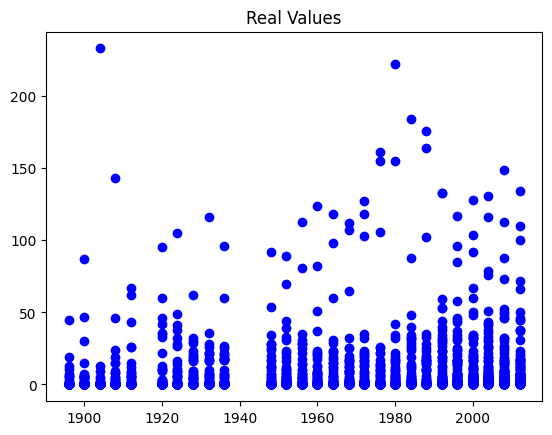

In [ ]:
plt.scatter(df['Year'], df['MedalsWon'], color='blue', label='True')
plt.title('Real Values')

Text(0.5, 1.0, 'Baseline')

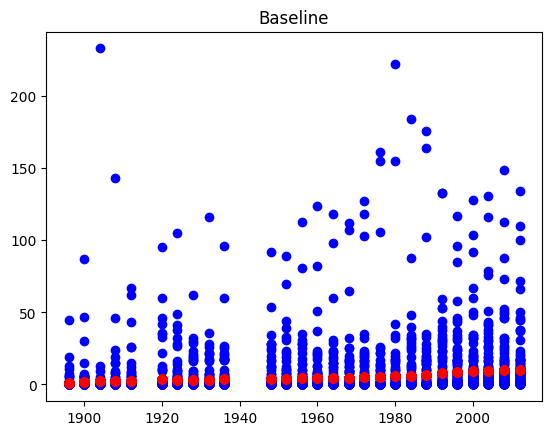

In [ ]:
# X_test_baseline['MedalsWon'], y_pred_baseline
"""
plt.scatter(train[metric], train['medals'], color='blue', label='True')
plt.scatter(train[metric], y_hat, color='red', label='Predicted')
plt.legend()
"""
plt.scatter(df['Year'], df['MedalsWon'], color='blue', label='True')
plt.scatter(df['Year'], df['MedalsWonYearSum'], color='red', label='Predicted')
plt.title('Baseline')

In [ ]:
# df['pred'] = model_rf.predict(predictors).transpose()
# df.to_csv("/content/FullyMelted.csv")

Text(0.5, 1.0, 'Random Forest')

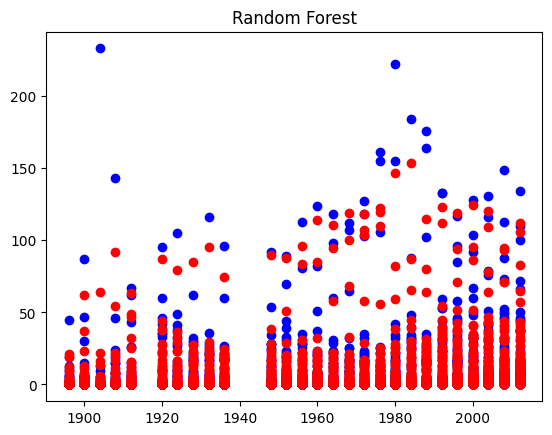

In [ ]:
# X_test_rf    y_pred_rf
plt.scatter(df['Year'], df['MedalsWon'], color='blue', label='True')
plt.scatter(df['Year'], model_rf.predict(predictors), color='red', label='Predicted')
plt.title('Random Forest')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(


Text(0.5, 1.0, 'Neural Network')

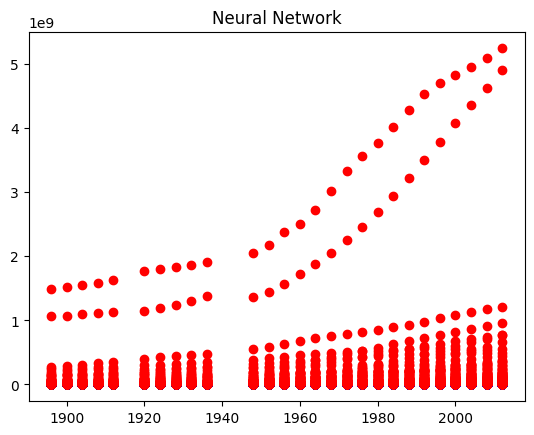

In [ ]:
# y_pred_nn = model_nn.predict(X_test_nn_scaled)
plt.scatter(df['Year'], df['MedalsWon'], color='blue', label='True')
plt.scatter(df['Year'], model_nn.predict(predictors), color='red', label='Predicted')
plt.title('Neural Network')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


Text(0.5, 1.0, 'Recursive')

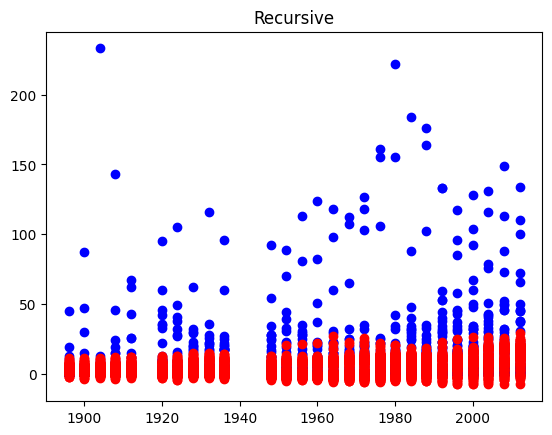

In [ ]:
# y_pred_recursive = model_recursive.predict(X_test_recursive_selected)
plt.scatter(df['Year'], df['MedalsWon'], color='blue', label='True')
plt.scatter(df['Year'], model_recursive.predict(predictors[selected_feature_names_recursive]), color='red', label='Predicted')
plt.title('Recursive')

In [ ]:
len(X_test)

503

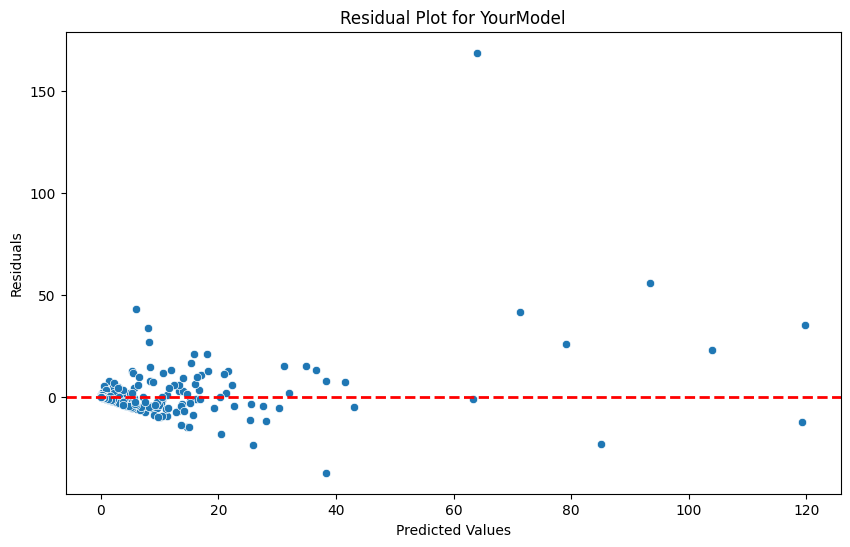

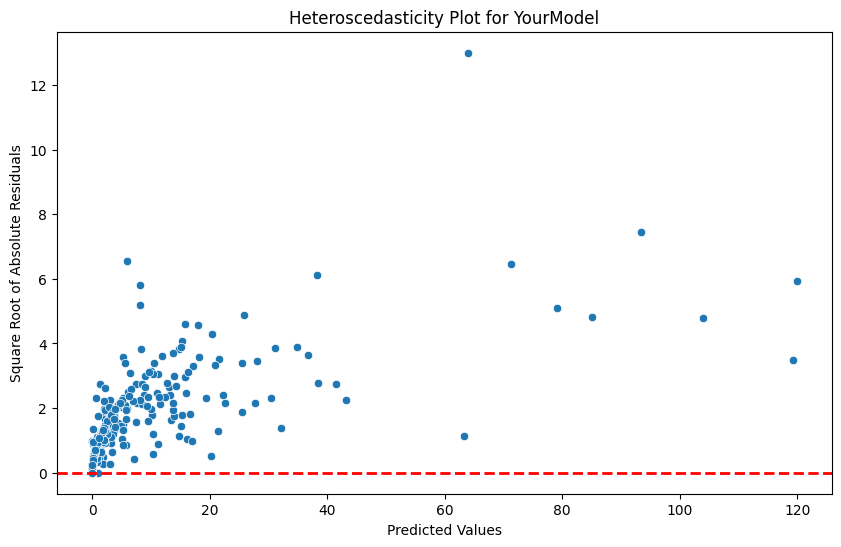

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming y_test is the true values and y_pred is the predicted values
# Replace 'YourModel' with the actual model name or type
# Replace 'residuals' with the name you want for your residuals variable
y_true = y_test
y_pred = model_rf.predict(X_test)

# Calculate residuals
residuals = y_true - y_pred

# Create residual plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.title('Residual Plot for YourModel')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# Create heteroscedasticity plot (scale-location plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=np.abs(residuals)**0.5)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.title('Heteroscedasticity Plot for YourModel')
plt.xlabel('Predicted Values')
plt.ylabel('Square Root of Absolute Residuals')
plt.show()


# Chat GPT Usage

## Chat gpt prompts:


### testing code generation
"could you provide 2 code snippets:
1. a code snippet that includes a feature polynomial expansion and feature selection code. this should retain the names of the features, return a concise feature list of the optimal selection.
2. a code snippet that runs linear regression using the selected feture lisyt. it should print the r^2 and MSE score"

### problems and changes
- we weren't familiar with lasso and wanted to use something we had worked on in Lab. This is generation showed us a clear and well commented workflow to ML components. Clarity and keeping discrete concepts to their own blocks helped immensly with the collabroatiove aspects of the project; it allowed blocks to be uninterupted by other members work, and the comments meant it was easy for someone other than Finlay to read and change the code when running things.
- asked to use linear regression other than



## Order of operations

1. generate an ML model using chatgpt generation (polyexp + rfe)
  - change from lasso to linear (because we did linear)
  - retained feature names through the expansion
  - see general structure of ML workflow, comments are helpful
2. use a more general prompt to get our low-level models (baseline, polyexp, rfe, custom)
 - enumaerated and differentiable variable names were the nicest part of this step, it kept things to their own blocks which aided the the clarity and collaboration potential of gpt generated code.
3. expand to our final model count: baseline, poly, poly+1, rfe, custom, neural net, random forest, random forest +1
 - best part of this was the easy to present score comparison at the bottom.
 - for the +1 varients, it used in-place changes to the df and never took them back. this would've changed the data for each model after the change, but we fixed it by hand.
 - hyperparameters were filled under some choice that it never explained
4. Validation rewrite.
 - late into the deveolpment we still had no validation / test split, so using gpt we implemented the same 70/15/15 split for every model on the same randomstate setting.

### Original GPT Generated Code

In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming df is your DataFrame
# Extract features and target variable
X = df.drop(['Unnamed: 0', 'Country', 'Year', 'MedalsWon_Total'], axis=1)
y = df['MedalsWon_Total']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature polynomial expansion
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Feature selection using L1 regularization (lasso)
# Adjust the alpha parameter based on your preference
lasso = LinearRegression()
lasso.fit(X_train_poly, y_train)

# Select important features
sfm = SelectFromModel(lasso, threshold=-np.inf, max_features=5)  # Adjust max_features as needed
sfm.fit(X_train_poly, y_train)
X_train_selected = sfm.transform(X_train_poly)
X_test_selected = sfm.transform(X_test_poly)

# Get the selected feature names
selected_feature_names = X.columns[sfm.get_support()]

print("Selected Features:", selected_feature_names)
# #2
# Train linear regression model using selected features
model = LinearRegression()
model.fit(X_train_selected, y_train)

# Predictions on the test set
y_pred = model.predict(X_test_selected)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R^2 Score:", r2)
print("Mean Squared Error:", mse)


## Inital

lets start from the very top. I would like 4 differnt linear regression models:
1. 'baseline model'. this uses the medalsWon to predict the average of MedalsWon_total (but, this medals won totals should be averaged from taking the first occurance of every country row, i.e., AFG 2 is only counted once)
2. this is the polynomial expansion + recusive selection block.
3. this is similar to block 2, but no expansion just the recusive selection
4. this will be once I chose, just provide the skeleton code
this blocks should all have different varaible names as to not interfeere with eachother, all of them should use r^2 and MSE to compare scores and could you provide one more code snippet that:
- presents all scores next to eachother
- names the best and worst performing


### Original GPT Generated Code

In [ ]:
# model 1: baseline
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming df is your DataFrame
# Extract features and target variable
X_baseline = df[['MedalsWon']]
y_baseline = df.groupby('Country')['MedalsWon_Total'].first().mean()

# Split the data into training and testing sets
X_train_baseline, X_test_baseline, y_train_baseline, y_test_baseline = train_test_split(X_baseline, y_baseline, test_size=0.2, random_state=42)

# Train baseline model
model_baseline = LinearRegression()
model_baseline.fit(X_train_baseline, y_train_baseline)

# Predictions on the test set
y_pred_baseline = model_baseline.predict(X_test_baseline)

# Evaluate the baseline model
r2_baseline = r2_score(y_test_baseline, y_pred_baseline)
mse_baseline = mean_squared_error(y_test_baseline, y_pred_baseline)

print("Baseline Model Scores:")
print("R^2 Score:", r2_baseline)
print("Mean Squared Error:", mse_baseline)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming df is your DataFrame
# Extract features and target variable
X_poly = df.drop(['Unnamed: 0', 'Country', 'Year', 'MedalsWon_Total'], axis=1)
y_poly = pd.DataFrame(df.groupby('Country')['MedalsWon_Total'].first().mean(), columns=['MedalsWon_Total']).reset_index()['MedalsWon_Total']

# Split the data into training and testing sets
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y_poly, test_size=0.2, random_state=42)

# Feature polynomial expansion
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly_expanded = pd.DataFrame(poly.fit_transform(X_train_poly), columns=poly.get_feature_names_out(X_train_poly.columns))
X_test_poly_expanded = pd.DataFrame(poly.transform(X_test_poly), columns=poly.get_feature_names_out(X_test_poly.columns))

# Feature selection using Recursive Feature Elimination (RFE)
# Adjust the n_features_to_select parameter based on your preference
lr_poly = LinearRegression()
rfe_poly = RFE(lr_poly, n_features_to_select=5)
X_train_poly_selected = rfe_poly.fit_transform(X_train_poly_expanded, y_train_poly)
X_test_poly_selected = rfe_poly.transform(X_test_poly_expanded)

# Get the selected feature names
selected_feature_names_poly = X_train_poly_expanded.columns[rfe_poly.support_]

print("Selected Features (Polynomial + Recursive):", selected_feature_names_poly)

# Train linear regression model using selected features
model_poly = LinearRegression()
model_poly.fit(X_train_poly_selected, y_train_poly)

# Predictions on the test set
y_pred_poly = model_poly.predict(X_test_poly_selected)

# Evaluate the model
r2_poly = r2_score(y_test_poly, y_pred_poly)
mse_poly = mean_squared_error(y_test_poly, y_pred_poly)

print("Polynomial + Recursive Model Scores:")
print("R^2 Score:", r2_poly)
print("Mean Squared Error:", mse_poly)


In [ ]:
# Assuming df is your DataFrame
# Extract features and target variable
X_recursive = df.drop(['Unnamed: 0', 'Country', 'Year', 'MedalsWon_Total'], axis=1)
y_recursive = pd.DataFrame(df.groupby('Country')['MedalsWon_Total'].first().mean(), columns=['MedalsWon_Total']).reset_index()['MedalsWon_Total']

# Split the data into training and testing sets
X_train_recursive, X_test_recursive, y_train_recursive, y_test_recursive = train_test_split(X_recursive, y_recursive, test_size=0.2, random_state=42)

# Feature selection using Recursive Feature Elimination (RFE)
# Adjust the n_features_to_select parameter based on your preference
lr_recursive = LinearRegression()
rfe_recursive = RFE(lr_recursive, n_features_to_select=5)
X_train_recursive_selected = rfe_recursive.fit_transform(X_train_recursive, y_train_recursive)
X_test_recursive_selected = rfe_recursive.transform(X_test_recursive)

# Get the selected feature names
selected_feature_names_recursive = X_train_recursive.columns[rfe_recursive.support_]

print("Selected Features (Recursive):", selected_feature_names_recursive)

# Train linear regression model using selected features
model_recursive = LinearRegression()
model_recursive.fit(X_train_recursive_selected, y_train_recursive)

# Predictions on the test set
y_pred_recursive = model_recursive.predict(X_test_recursive_selected)

# Evaluate the model
r2_recursive = r2_score(y_test_recursive, y_pred_recursive)
mse_recursive = mean_squared_error(y_test_recursive, y_pred_recursive)

print("Recursive Model Scores:")
print("R^2 Score:", r2_recursive)
print("Mean Squared Error:", mse_recursive)


In [ ]:
# Assuming you have the R^2 and MSE scores stored in variables like r2_baseline, mse_baseline, r2_poly, mse_poly, etc.

# Store scores in a dictionary for easy comparison
models_scores = {
    'Baseline Model': {'R^2': r2_baseline, 'MSE': mse_baseline},
    'Polynomial + Recursive': {'R^2': r2_poly, 'MSE': mse_poly},
    'Recursive Selection': {'R^2': r2_recursive, 'MSE': mse_recursive},
    'Custom Model': {'R^2': r2_custom, 'MSE': mse_custom}  # Replace with actual variable names for the custom model
}

# Print scores
print("Model Scores:")
for model, scores in models_scores.items():
    print(f"{model} - R^2: {scores['R^2']}, MSE: {scores['MSE']}")

# Identify best and worst models
best_model = max(models_scores, key=lambda x: models_scores[x]['R^2'])
worst_model = min(models_scores, key=lambda x: models_scores[x]['R^2'])

print(f"\nBest Model: {best_model} - R^2: {models_scores[best_model]['R^2']}, MSE: {models_scores[best_model]['MSE']}")
print(f"Worst Model: {worst_model} - R^2: {models_scores[worst_model]['R^2']}, MSE: {models_scores[worst_model]['MSE']}")


i would like to add 2 more code snippets.
1. uses a neualnetwork to decide and regress the data
2. uses random forrest model()

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming df is your DataFrame
# Extract features and target variable
X_nn = df.drop(['Unnamed: 0', 'Country', 'Year', 'MedalsWon', 'MedalsWon_Total'], axis=1)
y_nn = df['MedalsWon']

# Split the data into training and testing sets
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X_nn, y_nn, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_nn_scaled = scaler.fit_transform(X_train_nn)
X_test_nn_scaled = scaler.transform(X_test_nn)

# Create and train the neural network model
model_nn = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
model_nn.fit(X_train_nn_scaled, y_train_nn)

# Predictions on the test set
y_pred_nn = model_nn.predict(X_test_nn_scaled)

# Evaluate the model
r2_nn = r2_score(y_test_nn, y_pred_nn)
mse_nn = mean_squared_error(y_test_nn, y_pred_nn)

print("Neural Network Model Scores:")
print("R^2 Score:", r2_nn)
print("Mean Squared Error:", mse_nn)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame
# Extract features and target variable
X_rf = df.drop(['Unnamed: 0', 'Country', 'Year', 'MedalsWon', 'MedalsWon_Total'], axis=1)
y_rf = df['MedalsWon']

# Split the data into training and testing sets
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)

# Create and train the random forest model
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train_rf, y_train_rf)

# Predictions on the test set
y_pred_rf = model_rf.predict(X_test_rf)

# Evaluate the model
r2_rf = r2_score(y_test_rf, y_pred_rf)
mse_rf = mean_squared_error(y_test_rf, y_pred_rf)

print("Random Forest Model Scores:")
print("R^2 Score:", r2_rf)
print("Mean Squared Error:", mse_rf)


## Problems

- it often liked to make in-place changes to dataframes, some of which would effect the following blocks of code and change the data for the remaining models. i.e., df['MedalsWon'] += 1
-

### Validation scare prompt
- "okay, so i messed up big time. for all of the code snippets of the regression metrics I needed to use the validation set rather than the test set. Help me with a code snippet that splits my data before it is used across all of the different models. i should have 1 code block per replacement code (i.e., the randomforest shouldn't have its own test train split, it just copiess the general split), 1 initaal code block that splits and names the split copies as to east fix the notebook. then 1 last code block that chooses the best model and runs in on the test set, it should be the onnly block that uses the test set"



### Original GPT Generated Code

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(df.drop(['Unnamed: 0', 'Country', 'Year', 'MedalsWon', 'MedalsWon_Total'], axis=1),
                                                    df['MedalsWon'], test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
